# Sommaire :

<a href="#A1">**Part 1 : Preliminary**</a>

<a href="#A2">**Part 2 : Cleaning**</a>

<a href="#A3">**Part 3 : Preprocessing and EDA**</a>

<a href="#A4">**Part 4 : T-SNE et clustering**</a>
- <a href="#C41">4-1 : Data processed with  with CountVectorizer</a>
- <a href="#C42">4-2 : Data processed with  with TfidfVectorizer</a>
- <a href="#C43">4-3 : Data processed with word embedding Word2Vec</a>
- <a href="#C44">4-4 : Data processed with word embedding BERT</a>
- <a href="#C45">4-5 : Data processed with word embedding USE</a>

## <a name="A1">**Partie 1 : Présentation de la base**</a>

In [1]:
#Général
import numpy as np
import pandas as pd
import os
import datetime
import time

#Traitement du texte
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from sklearn.preprocessing import LabelEncoder

#Feature extraction
#Bag  of word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Word embedding
import tensorflow as TF
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

# BERT
import transformers
from sentence_transformers import SentenceTransformer

#Classification
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from nltk.classify import NaiveBayesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from sklearn.metrics import adjusted_rand_score
from nltk.classify import accuracy
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, auc

#model selection
from sklearn.model_selection import GridSearchCV, train_test_split

#Visualisation
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import plotly.graph_objs as go

#Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
2023-02-27 08:35:22.966509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 08:35:23.822826: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 08:35:23.8229

In [172]:
# Descriptions produits
df = pd.read_csv(r"flipkart_com-ecommerce_sample_1050.csv")
#rw_mount('https://formation8255568772.blob.core.windows.net/azureml-blobstore-d91abf03-c366-4a10-aee4-ab1872147e47')

NameError: name 'rw_mount' is not defined

In [3]:
# Images
im = r"C:\Users\John\Desktop\Formation\6-Classifiez automatiquement des biens de consommation\1-Projet_6\Images"

In [4]:
df.sample(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
882,a6c820b76bc29bbe2d85eecad3de03f8,2015-12-20 08:26:17 +0000,http://www.flipkart.com/mandhania-cotton-bath-...,Mandhania Cotton Bath Towel,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWE5QUGZHGG8YZH,490.0,280.0,a6c820b76bc29bbe2d85eecad3de03f8.jpg,False,Buy Mandhania Cotton Bath Towel at Rs. 280 at ...,5,5,Mandhania,"{""product_specification""=>[{""key""=>""Machine Wa..."
872,7b1dd192151777c246a1c4e1fe0ddb4c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/trident-cotton-set-tow...,Trident Cotton Set of Towels,"[""Home Furnishing >> Bath Linen >> Towels""]",BTWEYHEHZGE7JTDJ,999.0,999.0,7b1dd192151777c246a1c4e1fe0ddb4c.jpg,False,"Trident Cotton Set of Towels (2 Bath Towels, B...",3.5,3.5,Trident,"{""product_specification""=>[{""key""=>""Material"",..."
330,394c2c627914e1eed9b8ac343583a679,2015-12-01 06:13:00 +0000,http://www.flipkart.com/asus-rt-n12-lx-300mbps...,Asus RT-N12 LX 300Mbps Wireless Router,"[""Computers >> Network Components >> Routers >...",RTRD6352VX7RZSWG,3950.0,1990.0,394c2c627914e1eed9b8ac343583a679.jpg,False,Buy Asus RT-N12 LX 300Mbps Wireless Router onl...,4.1,4.1,Asus,"{""product_specification""=>[{""key""=>""Firewall"",..."
333,d4b625befbbb7e8004e53c187f286e11,2015-12-01 06:13:00 +0000,http://www.flipkart.com/binatone-wr3000n/p/itm...,Binatone WR3000N,"[""Computers >> Network Components >> Routers >...",RTRE2TYN2XUPCEVH,2995.0,2500.0,d4b625befbbb7e8004e53c187f286e11.jpg,False,Buy Binatone WR3000N only for Rs. 1800 from Fl...,No rating available,No rating available,Binatone,"{""product_specification""=>[{""key""=>""Wireless S..."
1004,6325bf868b9040a0599f257aba42e9e0,2016-03-03 11:29:08 +0000,http://www.flipkart.com/doraemon-gift-family-c...,Doraemon Gift Family Ceramic Coffee Mug Multic...,"[""Baby Care >> Baby & Kids Gifts >> Decoration...",DECEG7K7Y3URGWXH,399.0,280.0,6325bf868b9040a0599f257aba42e9e0.jpg,False,Specifications of Doraemon Gift Family Ceramic...,No rating available,No rating available,Doraemon Gift Family Ceramic Coffee Mug,"{""product_specification""=>[{""key""=>""Sales Pack..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
#print('nb d\'images : ',len(os.listdir(im)))

OSError: [Errno 22] Invalid argument: 'C:\\Users\\John\\Desktop\\Formation\\6-Classifiez automatiquement des biens de consommation\\1-Projet_6\\Images'

## <a name="A2">**Partie 2 : Cleaning**</a>

## Suppression des colonnes et lignes vides

In [8]:
df.drop(columns = 'brand', inplace = True)
df.dropna(axis = 'rows', how = 'any', inplace = True)
df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1048 non-null   object 
 1   crawl_timestamp          1048 non-null   object 
 2   product_url              1048 non-null   object 
 3   product_name             1048 non-null   object 
 4   product_category_tree    1048 non-null   object 
 5   pid                      1048 non-null   object 
 6   retail_price             1048 non-null   float64
 7   discounted_price         1048 non-null   float64
 8   image                    1048 non-null   object 
 9   is_FK_Advantage_product  1048 non-null   bool   
 10  description              1048 non-null   object 
 11  product_rating           1048 non-null   object 
 12  overall_rating           1048 non-null   object 
 13  product_specifications   1048 non-null   object 
dtypes: bool(1), float64(2), 

## <a name="A3">**Part 3 : Preprocessing and EDA**</a>

### 'class_' column added

In [9]:
regexp_cat = '\[\"(?P<cat_1>[\w\s&,\']+)>>(?P<cat_2>[\w\s&,\']+)>*(?P<cat_3>[\w\s&,\']*).*'

In [10]:
def get_cat(text, regexp, name):

    """ Test a regexp on a text, if here is a mach return the stripped specified named group."""

    match = re.match(regexp, text)
    if match is None:
        pass
    else:
        return match.group(name).strip()

In [11]:
# on crée une colonne class
df["class_"] = df["product_category_tree"].apply(lambda x: get_cat(x, regexp_cat, 'cat_1'))

In [12]:
# les classes
df['class_'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

### Text Cleaning and tokenizing

In [13]:
# Lower case
df["cleaned"] = df['description'].apply(lambda x: x.lower())
df[['description','cleaned']].head()

,description,cleaned
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications of sathiyas cotton bath towel (...
2,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...
3,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
4,Maserati Time R8851116001 Analog Watch - For ...,maserati time r8851116001 analog watch - for ...


In [14]:
# Punctuation removal function
def remove_punct(text):
    """
        Remove the punctuation
    """
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    #return text.translate(str.maketrans('', '', string.punctuation))

In [15]:
# Remove punctuations from the text
df["cleaned"] = df["cleaned"].apply(lambda x: remove_punct(x))
df[['description','cleaned']].head()

,description,cleaned
0,Key Features of Elegance Polyester Multicolor ...,key features of elegance polyester multicolor ...
1,Specifications of Sathiyas Cotton Bath Towel (...,specifications of sathiyas cotton bath towel 3...
2,Key Features of SANTOSH ROYAL FASHION Cotton P...,key features of santosh royal fashion cotton p...
3,Key Features of Jaipur Print Cotton Floral Kin...,key features of jaipur print cotton floral kin...
4,Maserati Time R8851116001 Analog Watch - For ...,maserati time r8851116001 analog watch for b...


In [16]:
# Tokenizing
from nltk.tokenize import word_tokenize

df['tokenized'] = df['cleaned'].apply(word_tokenize)
df[['cleaned','tokenized']].head()

,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,specifications of sathiyas cotton bath towel 3...,"[specifications, of, sathiyas, cotton, bath, t..."
2,key features of santosh royal fashion cotton p...,"[key, features, of, santosh, royal, fashion, c..."
3,key features of jaipur print cotton floral kin...,"[key, features, of, jaipur, print, cotton, flo..."
4,maserati time r8851116001 analog watch for b...,"[maserati, time, r8851116001, analog, watch, f..."


In [17]:
# Removing stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/azureuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, features, elegance, polyester, multicolo..."
1,specifications of sathiyas cotton bath towel 3...,"[specifications, sathiyas, cotton, bath, towel..."
2,key features of santosh royal fashion cotton p...,"[key, features, santosh, royal, fashion, cotto..."
3,key features of jaipur print cotton floral kin...,"[key, features, jaipur, print, cotton, floral,..."
4,maserati time r8851116001 analog watch for b...,"[maserati, time, r8851116001, analog, watch, b..."


In [18]:
# Removing non english word
nltk.download('words')
words = set(nltk.corpus.words.words())

stop = set(stopwords.words('english'))
df['tokenized'] = df['tokenized'].apply(lambda x: [word for word in x if word in words])
df[['cleaned','tokenized']].head()

[nltk_data] Downloading package words to /home/azureuser/nltk_data...
[nltk_data]   Package words is already up-to-date!


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, elegance, polyester, multicolor, abstrac..."
1,specifications of sathiyas cotton bath towel 3...,"[cotton, bath, towel, bath, towel, red, yellow..."
2,key features of santosh royal fashion cotton p...,"[key, royal, fashion, cotton, printed, king, s..."
3,key features of jaipur print cotton floral kin...,"[key, print, cotton, floral, king, sized, doub..."
4,maserati time r8851116001 analog watch for b...,"[time, watch, buy, time, watch, great, genuine..."


In [136]:
# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

for i in range(1048) : 
    df['tokenized'][i] = lemma_fct(df['tokenized'][i])
df[['cleaned','tokenized']].head()

/tmp/ipykernel_22289/4049094958.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'][i] = lemma_fct(df['tokenized'][i]) #.apply(lambda x: [word for word in x if word in words])


,cleaned,tokenized
0,key features of elegance polyester multicolor ...,"[key, elegance, polyester, multicolor, abstrac..."
1,specifications of sathiyas cotton bath towel 3...,"[cotton, bath, towel, bath, towel, red, yellow..."
2,key features of santosh royal fashion cotton p...,"[key, royal, fashion, cotton, printed, king, s..."
3,key features of jaipur print cotton floral kin...,"[key, print, cotton, floral, king, sized, doub..."
4,maserati time r8851116001 analog watch for b...,"[time, watch, buy, time, watch, great, genuine..."


In [19]:
# Prerequisite for CountVectorizer : aggregate the words into a sentence
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

df['combined'] = df['tokenized'].apply(lambda x : combine_text(x))
df[['tokenized','combined']].head()

,tokenized,combined
0,"[key, elegance, polyester, multicolor, abstrac...",key elegance polyester multicolor abstract eye...
1,"[cotton, bath, towel, bath, towel, red, yellow...",cotton bath towel bath towel red yellow blue b...
2,"[key, royal, fashion, cotton, printed, king, s...",key royal fashion cotton printed king sized do...
3,"[key, print, cotton, floral, king, sized, doub...",key print cotton floral king sized double prin...
4,"[time, watch, buy, time, watch, great, genuine...",time watch buy time watch great genuine day re...


Text(0.5, 0, 'nb of word')

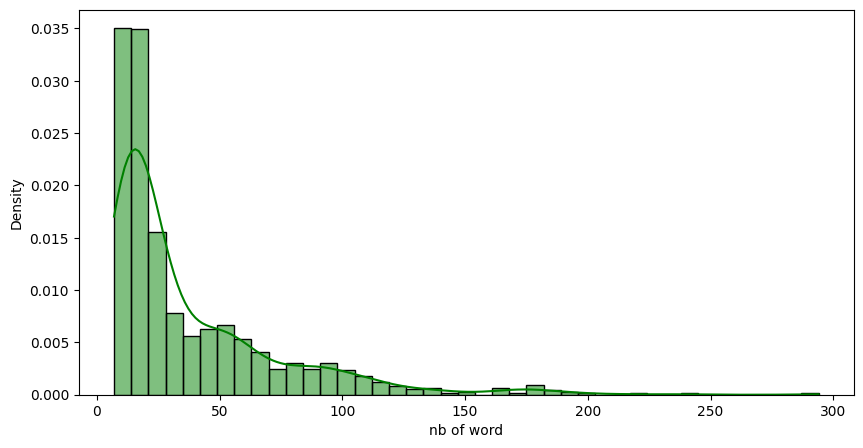

In [150]:
# distribution du nombre de mot par description après tokenization
data = [len(i) for i in df.tokenized]
plt.figure(figsize=(10,5))
ax.set_xlabel("nb of word")

In [163]:
# Pareto de la fréquence des mots
voc = set()
corpus = []
for i in [i for i in df.tokenized]:
    voc = set(i) | voc
    for j in i :
        corpus.append(j)

for i in voc : 
    count i in corpus

In [169]:
corpus = []
for i in df.tokenized[0] :
    corpus.append(i)
corpus

['key',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'room',
 'environment',
 'romantic',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'home',
 'bright',
 'modernistic',
 'appeal',
 'attention',
 'sure',
 'steal',
 'heart',
 'contemporary',
 'eyelet',
 'valance',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'close',
 'evening',
 'create',
 'special',
 'joyous',
 'beauty',
 'given',
 'soothing',
 'bring',
 'home',
 'elegant',
 'curtain',
 'softly',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'doo

### Text Features Extraction (CountVectorizer and TfidfVectorizer)

In [20]:
# colorisation de la matrice
def color(val):
    
    color = 'mediumaquamarine' if val > 0 else ''
    return 'background-color: %s' % color

In [21]:
%%time
text_list = list(df['combined'])
#count_vectorizer method
count_cv = CountVectorizer()
tf_cv = count_cv.fit_transform(text_list)
tf_feature_names_cv = count_cv.get_feature_names_out()

#tf-idf method
count_tf = TfidfVectorizer()
tf_tf = count_tf.fit_transform(text_list)
tf_feature_names_tf = count_tf.get_feature_names_out()

print('Term Frequency of Document')
cv = pd.DataFrame(tf_cv.toarray(), columns = tf_feature_names_cv) / len(tf_feature_names_cv)
cv.style.set_caption("Term Frequency of Document")
cv.style.applymap(color)
cv.head()

tf = pd.DataFrame(tf_tf.toarray(), columns = tf_feature_names_tf) / len(tf_feature_names_tf)
tf.style.set_caption("Term Frequency of Document")
tf.style.applymap(color)
tf.head()

Term Frequency of Document
CPU times: user 147 ms, sys: 24.3 ms, total: 172 ms
Wall time: 205 ms


,aa,ability,able,abode,abroad,absolute,absorbency,absorbent,absorber,absorbing,...,young,youth,youthful,youve,zero,zinc,zip,zipper,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
df_cv = pd.concat([cv,df['class_']], axis=1)
df_tf = pd.concat([tf,df['class_']], axis=1)

## <a name="A4">**Part 4 : T-SNE et clustering**</a>

In [52]:
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, l_cat) :
    time1 = time.time()
    num_labels=len(set(l_cat))
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    
    # #Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=42)
    cls.fit(X_tsne)
    
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(y_cat_num), loc="best", title="Categorie")#--------------l_cat
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

## <a name="C41">4-1 : Data processed with  with CountVectorizer</a>

In [24]:
# Définition of X and y
df_ = df_cv
X = df_.drop(columns='class_')
y= df_['class_']
y_cat_num = LabelEncoder().fit_transform(y)

# X and y split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )

In [25]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

CountVectorizer : 
-----------------
ARI :  0.377 time :  64.0


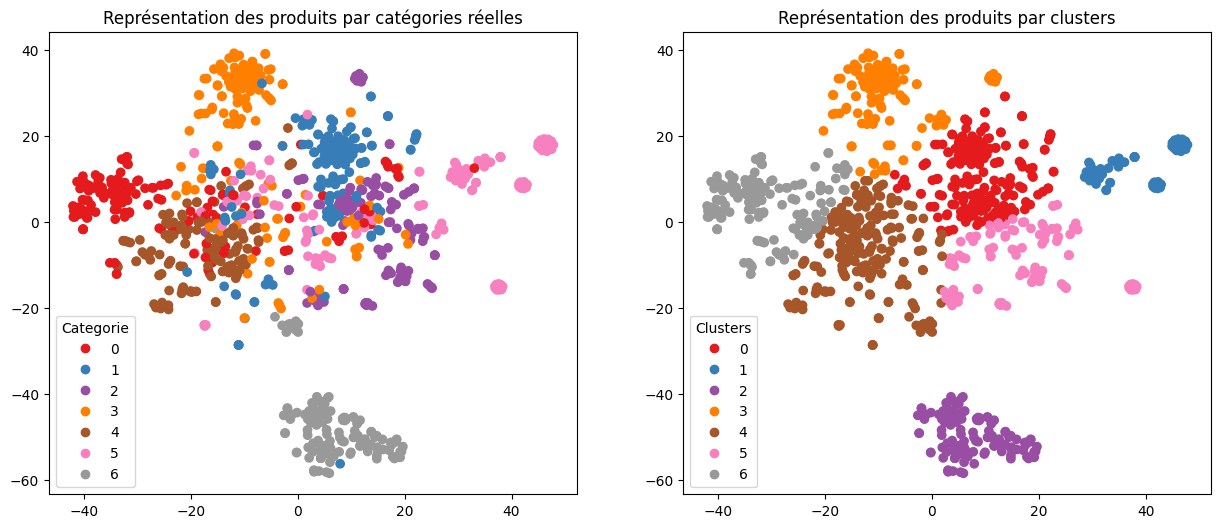

ARI :  0.377


In [26]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C42">4-2 : Data processed with  with TfidfVectorizer</a>

In [27]:
# Définition of X and y
df_ = df_tf
X = df_.drop(columns='class_')
y= df_['class_']
y_cat_num = LabelEncoder().fit_transform(y)

# X and y split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
    test_size=0.3,
    random_state=42
                    )

In [28]:
print("TfidfVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X,y)

TfidfVectorizer : 
-----------------
ARI :  0.4382 time :  84.0


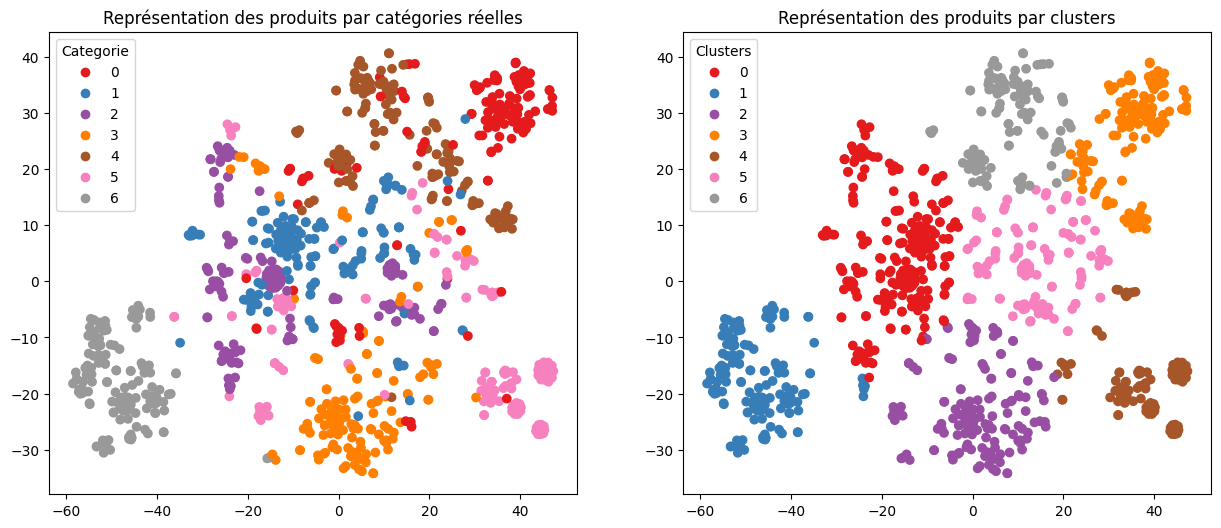

ARI :  0.4382


In [29]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C43">4-3 : Data processed with word embedding Word2Vec</a>

In [30]:
# Instanciation du modèle Word2Vec

# Initialisation

#{'workers': 11, 'negative': 5, 'vector_size': 300, 'sample': 0, 'min_count': 1, 'dm': 0}

w2v_sg=1
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 24 # adapt to length of sentences
sentences = df['cleaned'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

#w2v_model = Word2Vec(sg=0,min_count=1,window=3)#,workers=cores-1) size=100,
#w2v_model.build_vocab(df.tokenized, progress_per=1000)

# Création du modèle Word2Vec

w2v_model = gensim.models.Word2Vec(sg=w2v_sg,
                                                min_count=w2v_min_count, 
                                                window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())

In [31]:
%%time
# Entraînement du modèle Word2Vec

print("train Word2Vec model ...")
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

train Word2Vec model ...
Vocabulary size: 5430
Word2Vec trained
CPU times: user 42.9 s, sys: 50.7 ms, total: 42.9 s
Wall time: 43.8 s


In [32]:
%%time
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5431
CPU times: user 65.1 ms, sys: 3.93 ms, total: 69 ms
Wall time: 75.8 ms


In [33]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (5431, 300)


In [34]:
# Création du modèle d'embedding

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           1629300   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,629,300
Trainable params: 1,629,300
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Execution du modèle d'embedding

embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 1ms/step


(1048, 300)

In [36]:
ARI, X_tsne, labels = ARI_fct(embeddings,y)

ARI :  0.2918 time :  9.0


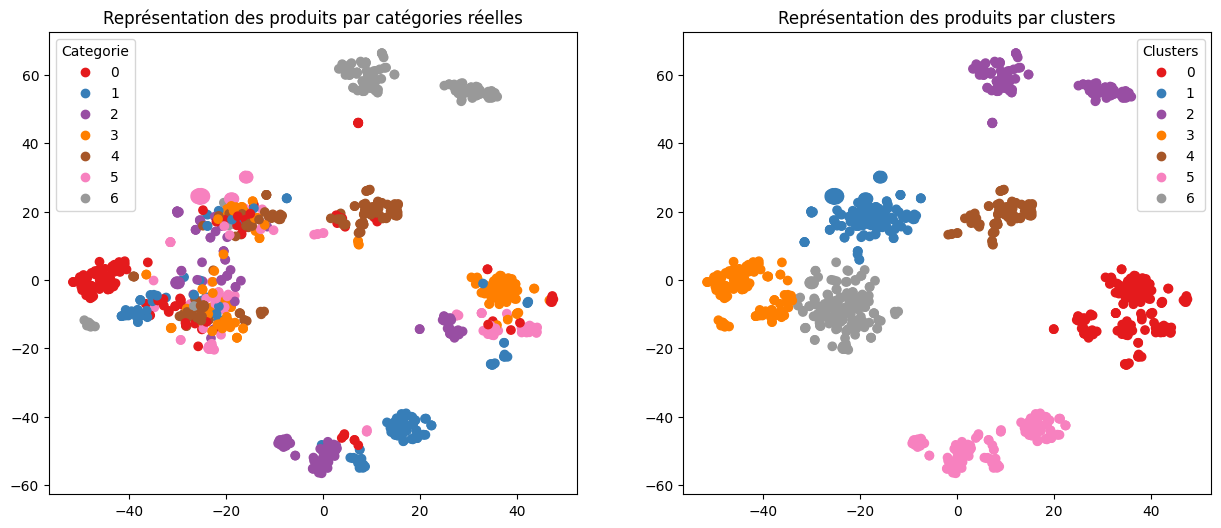

ARI :  0.2918


In [37]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C44">4-4 : Data processed with word embedding BERT</a>

# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### 'bert-base-uncased'

In [47]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/transformers/generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/transformers/generation_tf_utils.py:24: FutureWarning: Importing `TFGenerationMixin` from `src/transformers/generation_tf_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import TFGenerationMixin` instead.
  warnings.warn(


In [121]:
max_length = 295
batch_size = 8
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df['cleaned'].to_list()

In [122]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 1s/step
temps traitement :  207.0


In [118]:
features_bert.shape

(1048, 768)

In [119]:
ARI, X_tsne, labels = ARI_fct(features_bert,y)

ARI :  0.2806 time :  5.0


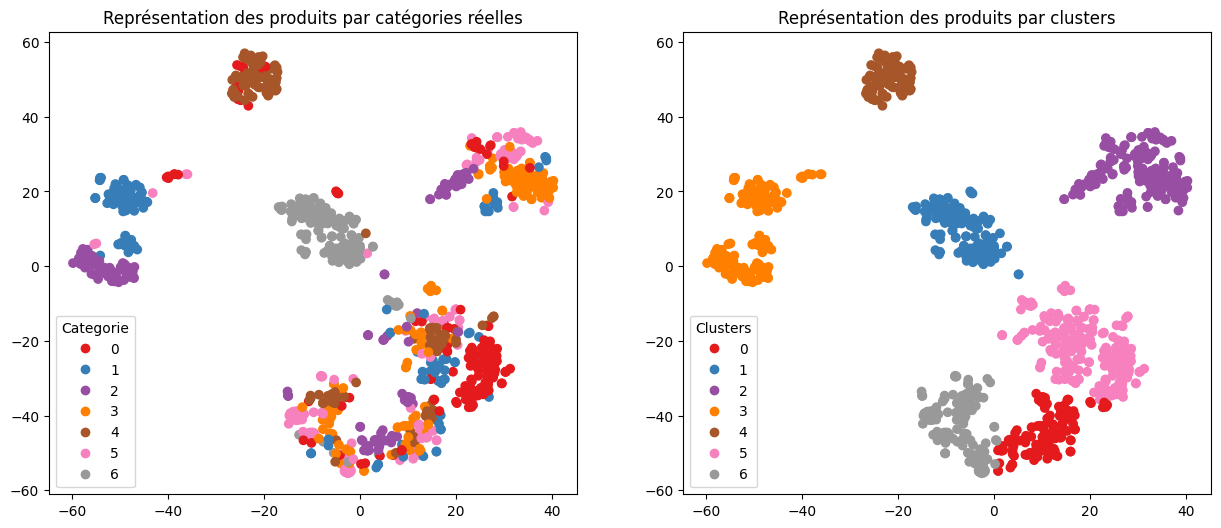

ARI :  0.2806


In [120]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## <a name="C45">4-5 : Data processed with word embedding USE</a>

In [124]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [125]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
True


In [126]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [127]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [129]:
batch_size = 8
sentences = df['cleaned'].to_list()

In [130]:
features_USE = feature_USE_fct(sentences, batch_size)

In [131]:
ARI, X_tsne, labels = ARI_fct(features_USE, y)

ARI :  0.44 time :  6.0


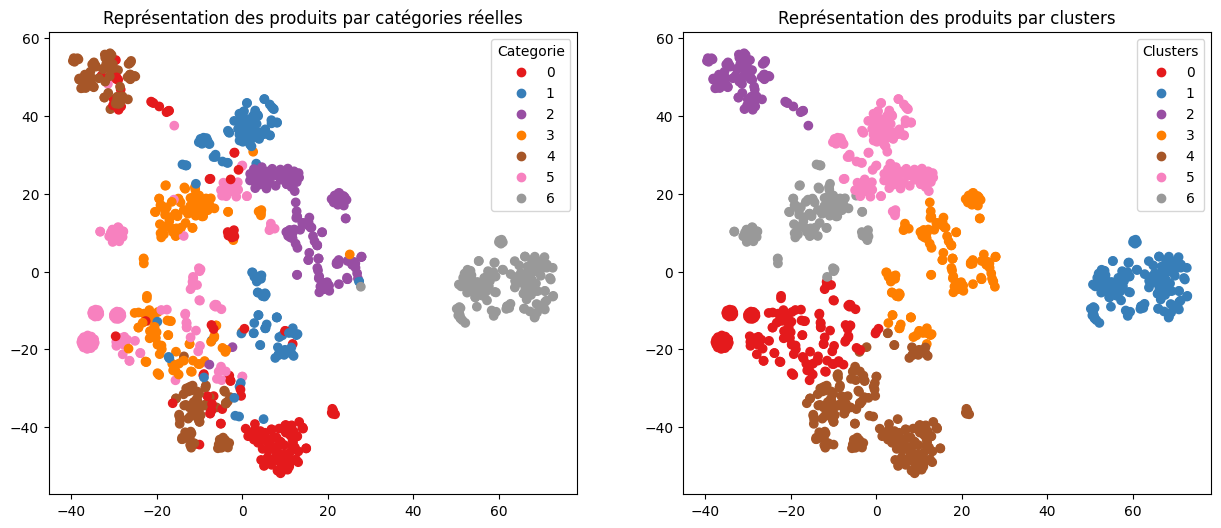

ARI :  0.44


In [132]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)